In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
all_trails=pd.read_csv('../side_projects/all-trails/all_trails.csv')

In [8]:
all_trails.head(3)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i


In [4]:
all_trails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

In [5]:
state_group = all_trails.groupby('state_name').count()
state_group

,trail_id,name,area_name,city_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
state_name,,,,,,,,,,,,,,,,,
Alaska,29,29,29,29,29,29,29,29,29,29,29,28,29,29,29,29,29
Arizona,174,174,174,174,174,174,174,174,174,174,174,164,174,174,174,174,174
Arkansas,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
California,707,707,707,707,707,707,707,707,707,707,707,633,707,707,707,707,707
Colorado,262,262,262,262,262,262,262,262,262,262,262,242,262,262,262,262,262
Florida,31,31,31,31,31,31,31,31,31,31,31,29,31,31,31,31,31
Georgia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Hawaii,35,35,35,35,35,35,35,35,35,35,35,29,35,35,35,35,35
Indiana,16,16,16,16,16,16,16,16,16,16,16,15,16,16,16,16,16


In [6]:
all_trails['state_name'].value_counts()

California        707
Washington        320
Wyoming           311
Utah              292
Colorado          262
Virginia          191
Maine             179
Tennessee         175
Arizona           174
Montana           151
North Carolina    118
Texas              94
Ohio               50
Hawaii             35
Florida            31
Alaska             29
Kentucky           28
Nevada             25
North Dakota       23
Oregon             22
South Dakota       20
Arkansas           16
Indiana            16
Maui               14
New Mexico          8
South Carolina      8
Minnesota           7
Michigan            4
Missouri            2
Georgia             1
Name: state_name, dtype: int64

In [7]:
all_trails['country_name'].value_counts()

United States    3264
Hawaii             49
Name: country_name, dtype: int64

In [ ]:
#rename all field where country = Hawaii, to country = United States
#all_trails = all_trails['country_name']

In [12]:
running_trails = all_trails[all_trails["activities"].str.contains("running")]

In [13]:
running_trails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 0 to 3303
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           1110 non-null   int64  
 1   name               1110 non-null   object 
 2   area_name          1110 non-null   object 
 3   city_name          1110 non-null   object 
 4   state_name         1110 non-null   object 
 5   country_name       1110 non-null   object 
 6   _geoloc            1110 non-null   object 
 7   popularity         1110 non-null   float64
 8   length             1110 non-null   float64
 9   elevation_gain     1110 non-null   float64
 10  difficulty_rating  1110 non-null   int64  
 11  route_type         1110 non-null   object 
 12  visitor_usage      1052 non-null   float64
 13  avg_rating         1110 non-null   float64
 14  num_reviews        1110 non-null   int64  
 15  features           1110 non-null   object 
 16  activities         1110 

In [14]:
running_trails_state = running_trails.state_name.value_counts()

In [15]:
running_trails_state

California        204
Wyoming           133
Maine             103
Washington        101
Tennessee          91
Colorado           80
Virginia           69
Arizona            67
Utah               48
North Carolina     48
Ohio               39
Montana            36
Texas              13
Arkansas           12
Kentucky           12
Alaska             11
Oregon              7
Indiana             6
North Dakota        6
South Dakota        5
Florida             4
Maui                4
Hawaii              4
Michigan            2
South Carolina      2
Georgia             1
Nevada              1
Missouri            1
Name: state_name, dtype: int64

In [16]:
wild_flowers = all_trails[all_trails["features"].str.contains("wild-flowers")]
wild_flowers

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i
6,10236080,Rock Creek Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73056, 'lng': -148.91955}",7.6876,7081.096,287.7312,3,out and back,1.0,4.0,39,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,10002035,Sliding Sands Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71473, 'lng': -156.25053}",23.5557,17702.740,851.9160,7,out and back,3.0,4.5,355,"['dogs-no', 'views', 'wild-flowers']","['birding', 'camping', 'hiking', 'nature-trips...",m
3301,10028926,Seven Sacred Pools Trail ('Ohe'o Gulch),Haleakala National Park,Hana,Maui,Hawaii,"{'lat': 20.662, 'lng': -156.04514}",19.7384,965.604,32.9184,1,loop,3.0,4.0,201,"['dogs-no', 'forest', 'kids', 'river', 'views'...","['birding', 'hiking', 'nature-trips', 'walking']",m
3302,10040498,Halalai'i and Pu'unaue Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71417, 'lng': -156.25093}",16.6764,20116.750,978.7128,5,loop,1.0,5.0,91,"['dogs-no', 'views', 'waterfall', 'wild-flower...","['backpacking', 'birding', 'camping', 'hiking'...",m
3305,10027793,Pa Ka'oao Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71479, 'lng': -156.25102}",11.5722,965.604,40.8432,3,loop,2.0,4.5,34,"['dogs-leash', 'kids', 'views', 'wild-flowers'...","['hiking', 'nature-trips', 'walking']",m


In [17]:
wild_flowers_state = wild_flowers.state_name.value_counts()
wild_flowers_state

California        462
Washington        256
Wyoming           222
Colorado          174
Utah              143
Montana           120
Tennessee         120
Maine             110
Virginia           98
Arizona            95
North Carolina     73
Texas              57
Hawaii             22
Ohio               15
Oregon             15
Alaska             13
North Dakota       10
Kentucky           10
South Dakota       10
Arkansas            9
Nevada              9
Indiana             8
Maui                6
Florida             5
Minnesota           5
New Mexico          4
South Carolina      2
Georgia             1
Name: state_name, dtype: int64

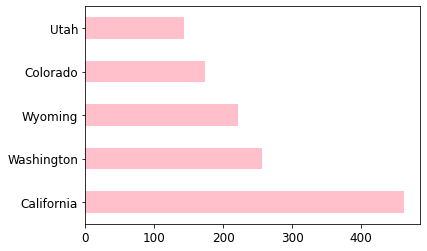

In [37]:
wild_flowers_state.head().plot(kind='barh',color='pink',fontsize = '12')

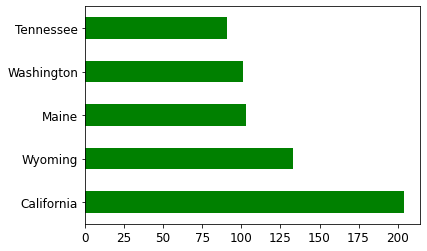

In [41]:
running_trails_state.head().plot(kind='barh',color='green',fontsize='12')

In [46]:
colors = ['yellow','green']
sns.crayon_palette(colors)

KeyError: 'yellow'

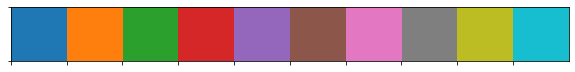

In [47]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

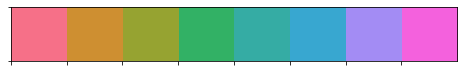

In [48]:
sns.palplot(sns.color_palette("husl", 8))

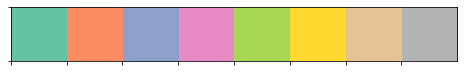

In [49]:
sns.palplot(sns.color_palette("Set2"))